# Some data visualization examples

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore', FutureWarning) # Seaborn triggers warnings in scipy

Change some of matplotlib's plotting defaults for better class presentation and set a nice Seaborn style.

In [2]:
plt.style.use('seaborn-white')
plt.rc('figure', dpi=100, figsize=(7, 5))
plt.rc('font', size=12)

## Kaiser births

Data from Deb Nolan's [StatLab](https://www.stat.berkeley.edu/~statlabs/labs.html#babies).

In [3]:
kdf = pd.read_csv("data/babies.data", delim_whitespace=True)
kdf.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


In [4]:
kdf['weight'].describe()

count    1236.000000
mean      153.976537
std       147.872525
min        87.000000
25%       115.000000
50%       126.000000
75%       140.000000
max       999.000000
Name: weight, dtype: float64

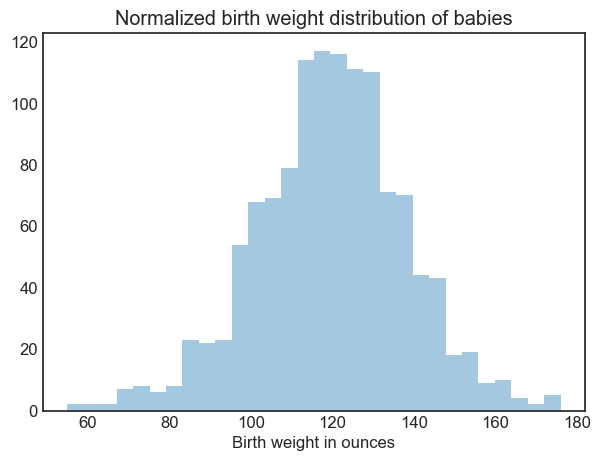

In [5]:
ax = sns.distplot(kdf['bwt'], rug=False, kde=False)
ax.set_xlabel("Birth weight in ounces")
ax.set_title("Normalized birth weight distribution of babies");

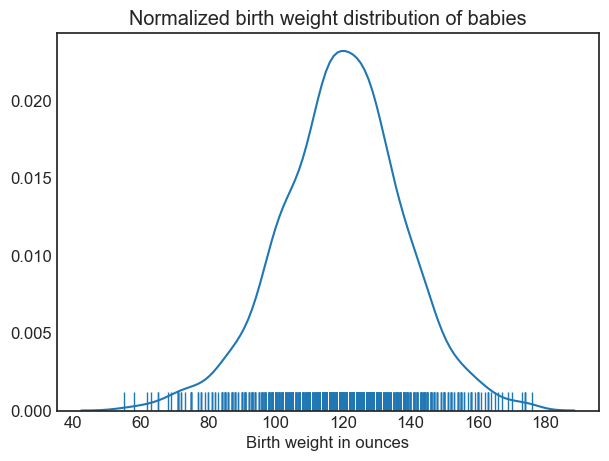

In [6]:
ax = sns.distplot(kdf.bwt, hist=False, rug=True)
ax.set_xlabel("Birth weight in ounces")
ax.set_title("Normalized birth weight distribution of babies");

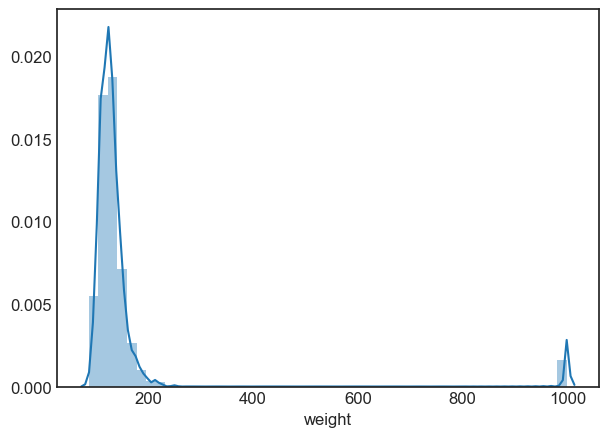

In [7]:
sns.distplot(kdf['weight']);

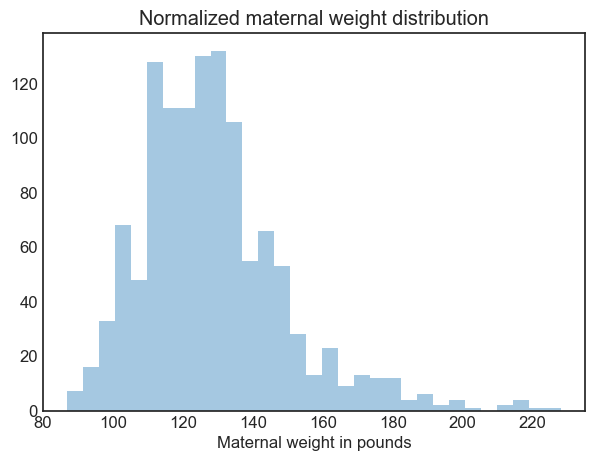

In [8]:
mweight = kdf['weight'][kdf['weight'] < 240] # drop outliers
ax = sns.distplot(mweight, kde=False)
ax.set_xlabel("Maternal weight in pounds")
ax.set_title("Normalized maternal weight distribution");

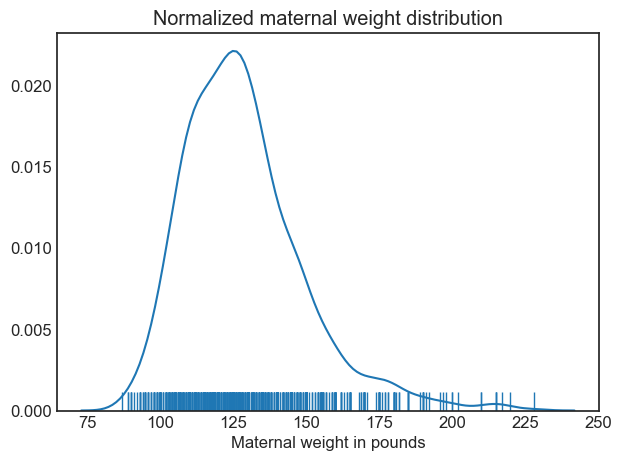

In [9]:
ax = sns.distplot(mweight, hist=False, rug=True)
ax.set_xlabel("Maternal weight in pounds")
ax.set_title("Normalized maternal weight distribution");

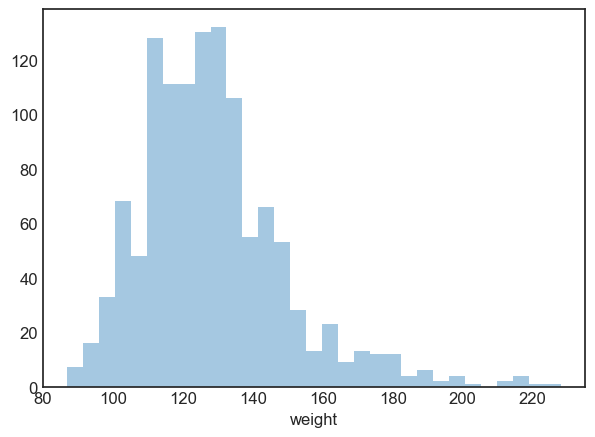

In [10]:
ax = sns.distplot(mweight, kde=False);

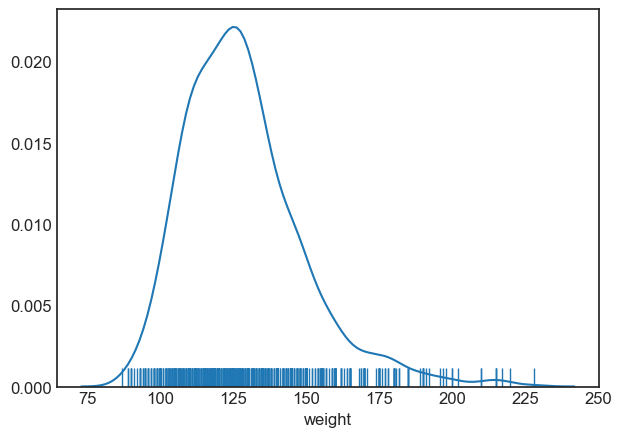

In [11]:
ax = sns.distplot(mweight, hist=False, rug=True);

In [12]:
kdf2 = pd.read_csv("data/babies23.data", delim_whitespace=True)
kdf2.head()

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
4,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5


In [13]:
kdf2.columns

Index(['id', 'pluralty', 'outcome', 'date', 'gestation', 'sex', 'wt', 'parity',
       'race', 'age', 'ed', 'ht', 'wt.1', 'drace', 'dage', 'ded', 'dht', 'dwt',
       'marital', 'inc', 'smoke', 'time', 'number'],
      dtype='object')

## Planned Parenthood

In [14]:
pp = pd.read_csv("data/plannedparenthood.csv")
pp

,year,screening,abortion
0,2006,2007371,289750
1,2013,935573,327000


In [15]:
# Compute percentage within year
pp["perScreen"] = 100 * pp["screening"] / (pp["screening"] + pp["abortion"])
pp["perAbort"] = 100 - pp["perScreen"]
pp

,year,screening,abortion,perScreen,perAbort
0,2006,2007371,289750,87.386385,12.613615
1,2013,935573,327000,74.100507,25.899493


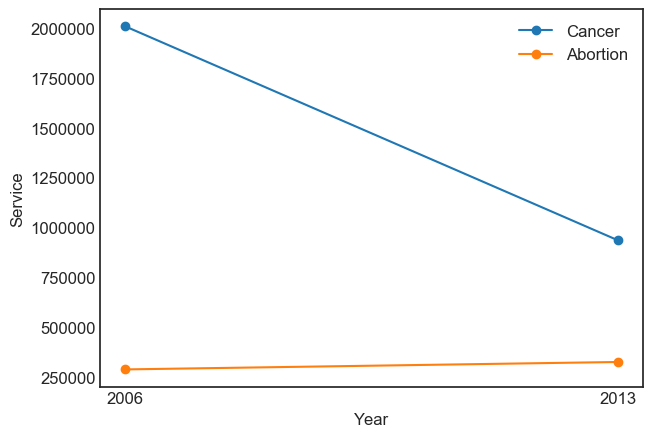

In [16]:
plt.plot(pp['year'], pp['screening'], linestyle="solid", marker="o", label='Cancer')
plt.plot(pp['year'], pp['abortion'], linestyle="solid", marker="o", label='Abortion')
plt.ylabel("Service")
plt.xlabel("Year")
plt.xticks([2006, 2013])
plt.legend();

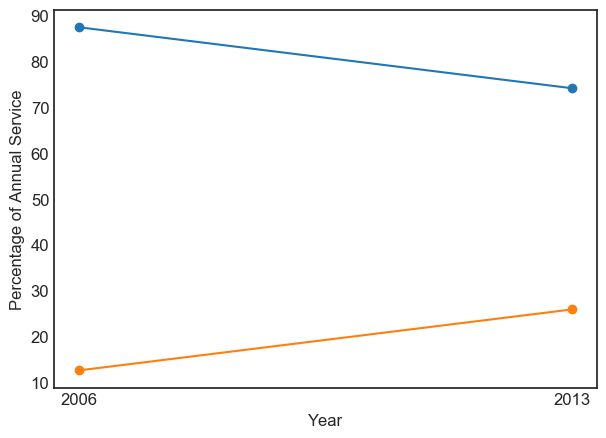

In [17]:
plt.plot(pp['year'], pp['perScreen'], linestyle="solid", marker="o", label='Cancer')
plt.plot(pp['year'], pp['perAbort'], linestyle="solid", marker="o", label='Abortion')
plt.ylabel("Percentage of Annual Service")
plt.xlabel("Year")
plt.xticks([2006, 2013]);

In [18]:
pp

,year,screening,abortion,perScreen,perAbort
0,2006,2007371,289750,87.386385,12.613615
1,2013,935573,327000,74.100507,25.899493


In [19]:
year = [2006, 2013, 2006, 2013]
proc = ['abortion', 'abortion', 'cancer', 'cancer']
perc = [12.613615, 25.899493, 87.386385, 74.100507]
df = pd.DataFrame(dict(year=year, proc=proc, perc=perc))
df

,year,proc,perc
0,2006,abortion,12.613615
1,2013,abortion,25.899493
2,2006,cancer,87.386385
3,2013,cancer,74.100507


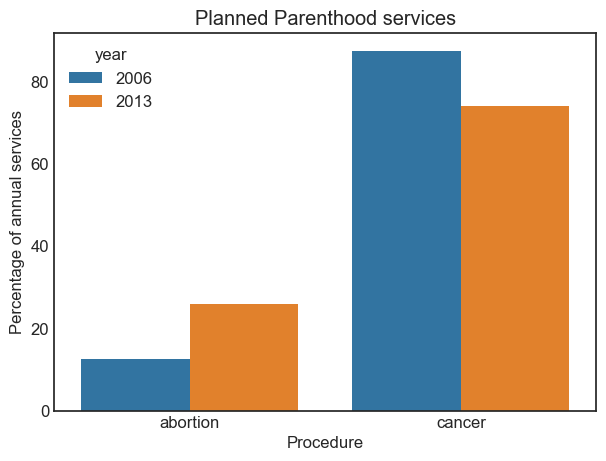

In [20]:
ax = sns.barplot( y = "perc", x = "proc", hue = "year", data = df)
ax.set_xlabel('Procedure')
ax.set_ylabel('Percentage of annual services')
ax.set_title('Planned Parenthood services');

/Users/fperez/usr/conda/envs/data100/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


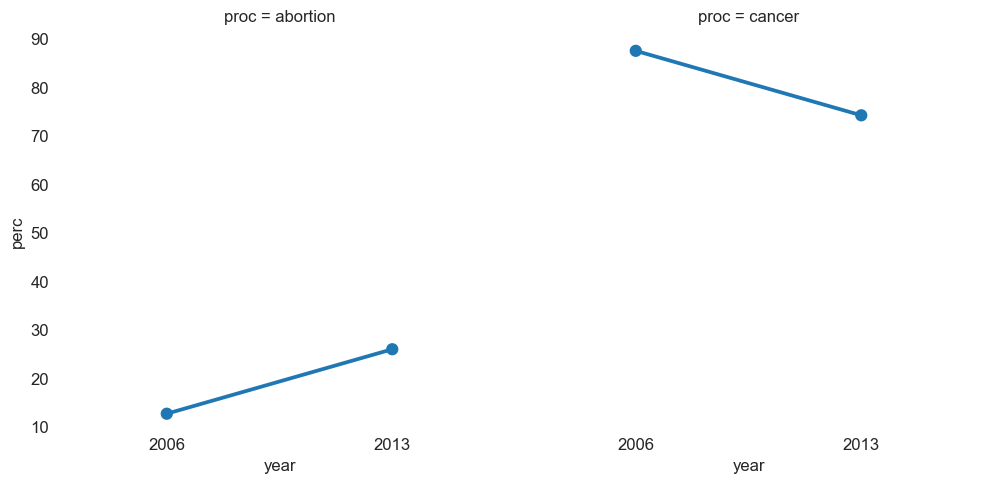

In [21]:
# sns.set_style("white")
sns.factorplot(x="year", y="perc", col="proc", data=df, aspect=1 )
sns.despine(bottom=True, left=True)

/Users/fperez/usr/conda/envs/data100/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


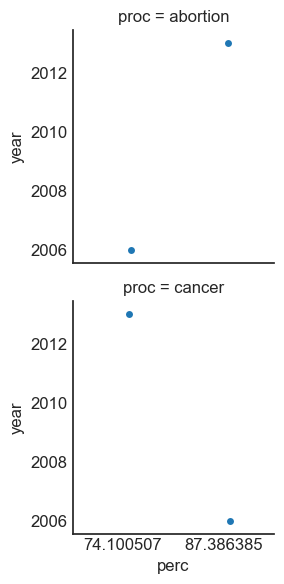

In [22]:
g = sns.FacetGrid(df, row="proc")
g.map(sns.stripplot, "perc","year")

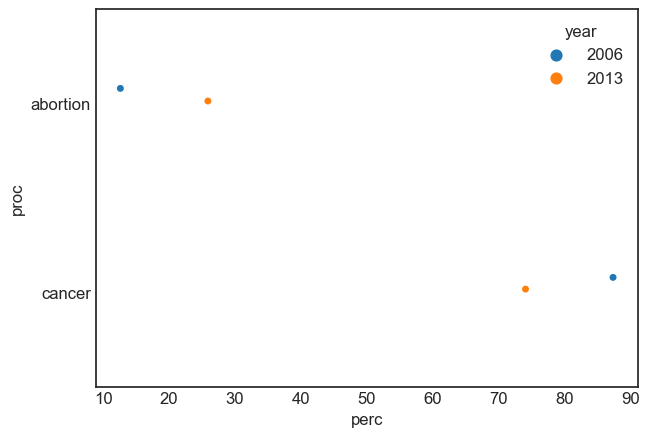

In [23]:
sns.stripplot( x = "perc", y = "proc", hue = "year", data = df)

## Current Population Survey

In [24]:
cps = pd.read_csv("data/edInc2.csv")
cps

,educ,gender,income
0,1,Men,517
1,1,Women,409
2,2,Men,751
3,2,Women,578
4,3,Men,872
5,3,Women,661
6,4,Men,1249
7,4,Women,965
8,5,Men,1385
9,5,Women,1049


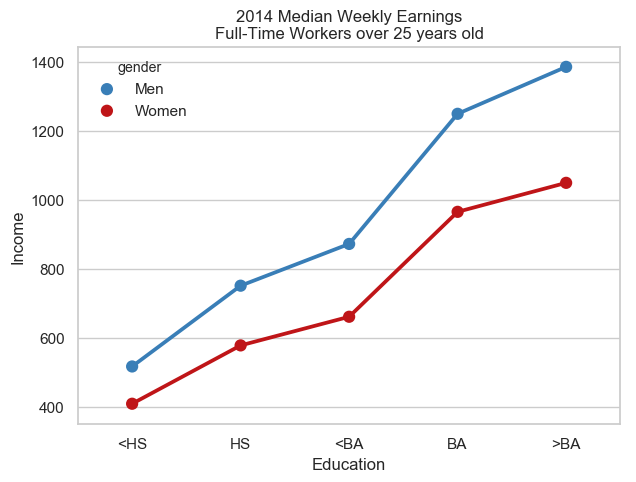

In [25]:
# make a factor plot
sns.set(style="whitegrid")

blue_red = ["#397eb7", "#bf1518"]

with sns.color_palette(sns.color_palette(blue_red)):
    ax = sns.pointplot(x = "educ", y = "income", hue = "gender", data = cps)
    
# need to fix tick mark labels
ticks = ["<HS", "HS", "<BA", "BA", ">BA"]
ax.set_xticklabels(ticks)
ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_title("2014 Median Weekly Earnings\nFull-Time Workers over 25 years old");

## Cherry Blossom Run

In [26]:
cb = pd.read_csv("data/cherryBlossomMen.csv")
cb.head()

,year,place,age,time
0,1999,1,28.0,2819.0
1,1999,2,24.0,2821.0
2,1999,3,27.0,2823.0
3,1999,4,28.0,2827.0
4,1999,5,26.0,2851.0


In [27]:
cb.tail()

,year,place,age,time
70065,2012,7189,39.0,8831.0
70066,2012,7190,56.0,8840.0
70067,2012,7191,35.0,8850.0
70068,2012,7192,NaN,8938.0
70069,2012,7193,48.0,9059.0


In [28]:
#smooth run time as a function of age for 1999 and for 2012
# plot smoothed curves

# SEE PAGE 52 of the old VIZ pptx

## Voter Registration

In [29]:
vote = pd.read_csv("data/voteCA2016.csv")
vote = vote.rename(columns={c:c.strip() for c in vote.columns})
vote.head()

,year,eligible,registered,dem,rep,other,decline
0,1992,20612814,13217022,0.485,0.389,0.031,0.095
1,1996,19298379,14314658,0.474,0.368,0.052,0.106
2,2000,21190865,14676174,0.462,0.349,0.052,0.137
3,2004,21843202,14945031,0.432,0.357,0.049,0.162
4,2008,22987562,15468551,0.427,0.336,0.044,0.193


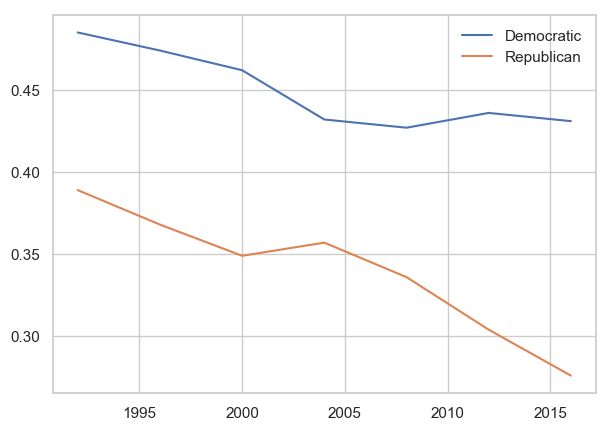

In [30]:
# Make a time series plot of percent by year
# Need to overlay plots or reshape the data
# SEE PAGE 64 of the old Viz PPTX
plt.plot(vote['year'], vote['dem'], label="Democratic")
plt.plot(vote['year'], vote['rep'], label="Republican")
plt.legend()
plt.savefig("Final.pdf")

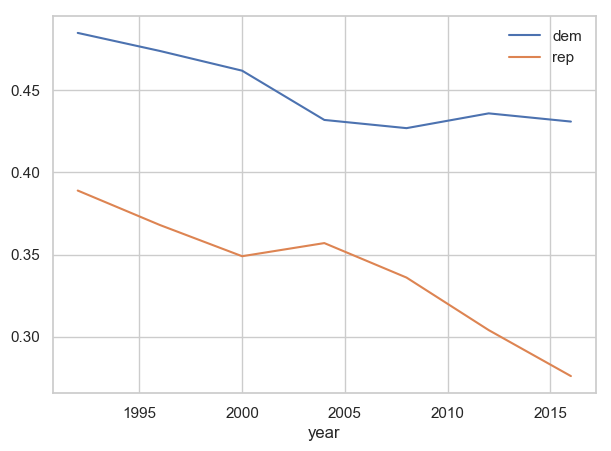

In [31]:
vote.plot(kind='line', x='year', y=['dem', 'rep'])

In [32]:
# vote.iplot(kind='line', x='year', y=['dem', 'rep'])

## CO2 Emissions 

In [33]:
co2 = pd.read_csv("data/CAITcountryCO2.csv", skiprows = 2,
                  names = ["Country", "Year", "CO2"])
co2.tail()

,Country,Year,CO2
30639,Vietnam,2012,173.0497
30640,World,2012,33843.0497
30641,Yemen,2012,20.5386
30642,Zambia,2012,2.7600
30643,Zimbabwe,2012,9.9800


In [34]:
last_year = co2.Year.iloc[-1]
last_year

2012

In [35]:
q = f"Country != 'World' and Country != 'European Union (15)' and Year == {last_year}"
top14_lasty = co2.query(q).sort_values('CO2', ascending=False).iloc[:14]
top14_lasty

,Country,Year,CO2
30490,China,2012,9312.5329
30634,United States,2012,5122.9094
30514,European Union (28),2012,3610.5137
30533,India,2012,2075.1808
30596,Russian Federation,2012,1721.5376
30541,Japan,2012,1249.2135
30521,Germany,2012,773.9585
30547,"Korea, Rep. (South)",2012,617.2418
30535,Iran,2012,593.8195
30485,Canada,2012,543.0242


In [36]:
top14 = co2[co2.Country.isin(top14_lasty.Country) & (co2.Year >= 1950)]
print(len(top14.Country.unique()))
top14.head()

14


,Country,Year,CO2
18822,Brazil,1950,19.6574
18829,Canada,1950,154.1408
18834,China,1950,78.6478
18858,European Union (28),1950,1773.6864
18865,Germany,1950,510.7323


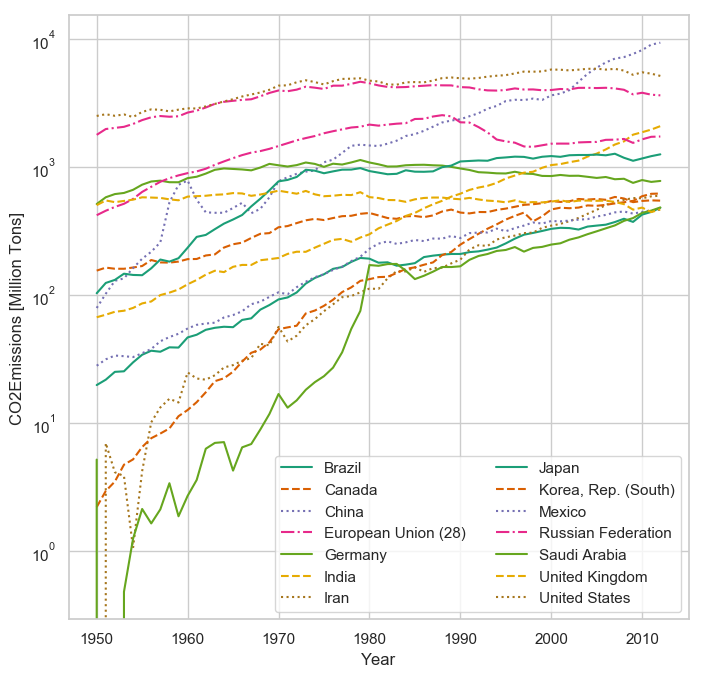

In [37]:
from cycler import cycler

linestyles = (['-', '--', ':', '-.']*3)[:7]
colors = plt.cm.Dark2.colors[:7]
lines_c = cycler('linestyle', linestyles)
color_c = cycler('color', colors)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_prop_cycle(lines_c + color_c)

x, y ='Year', 'CO2'
for name, df in top14.groupby('Country'):
    ax.semilogy(df[x], df[y], label=name)

ax.set_xlabel(x)
ax.set_ylabel(y + "Emissions [Million Tons]")
ax.legend(ncol=2, frameon=True);

## Kepler's third law

Details and data [can be found on Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Third_law_of_Kepler).

In [38]:
planets = pd.read_csv("data/planets.data", delim_whitespace=True, comment="#")
planets

,planet,mean_dist,period,kepler_ratio
0,Mercury,0.389,87.77,7.64
1,Venus,0.724,224.70,7.52
2,Earth,1.000,365.25,7.50
3,Mars,1.524,686.95,7.50
4,Jupiter,5.200,4332.62,7.49
5,Saturn,9.510,10759.20,7.43


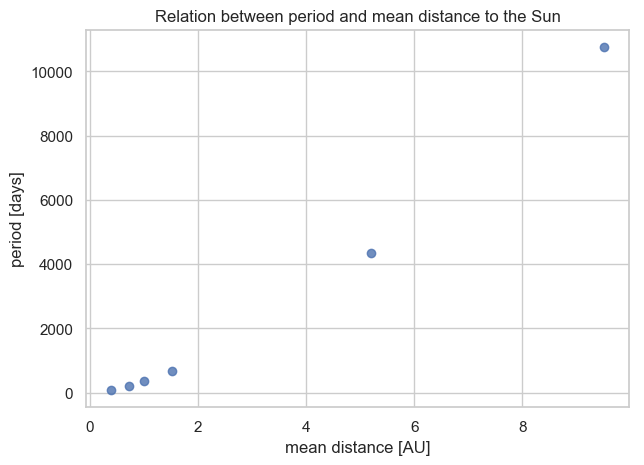

In [39]:
ax = sns.regplot('mean_dist', 'period', planets, fit_reg=False);
ax.set_title('Relation between period and mean distance to the Sun')
ax.set_xlabel('mean distance [AU]')
ax.set_ylabel('period [days]');

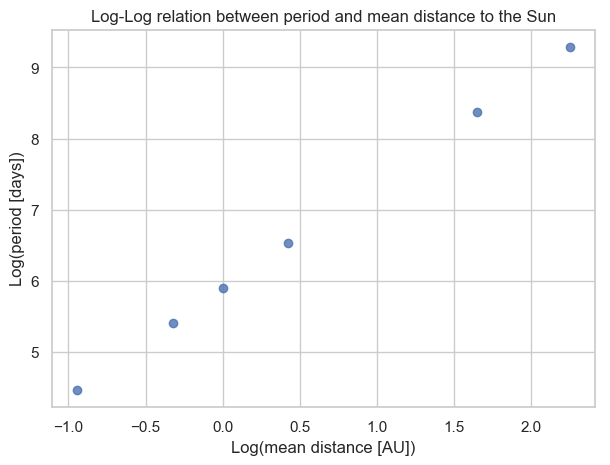

In [40]:
ax = sns.regplot(np.log(planets['mean_dist']), np.log(planets['period']), fit_reg=False)
ax.set_title('Log-Log relation between period and mean distance to the Sun')
ax.set_xlabel('Log(mean distance [AU])')
ax.set_ylabel('Log(period [days])');

In fact, Kepler's law actually states that:


$$
T^2\propto R^3
$$

For Kepler this was a data-driven phenomenological law, formulated in 1619. It could only be explained dynamically once Newton introduced his law of universal gravitation in 1687.

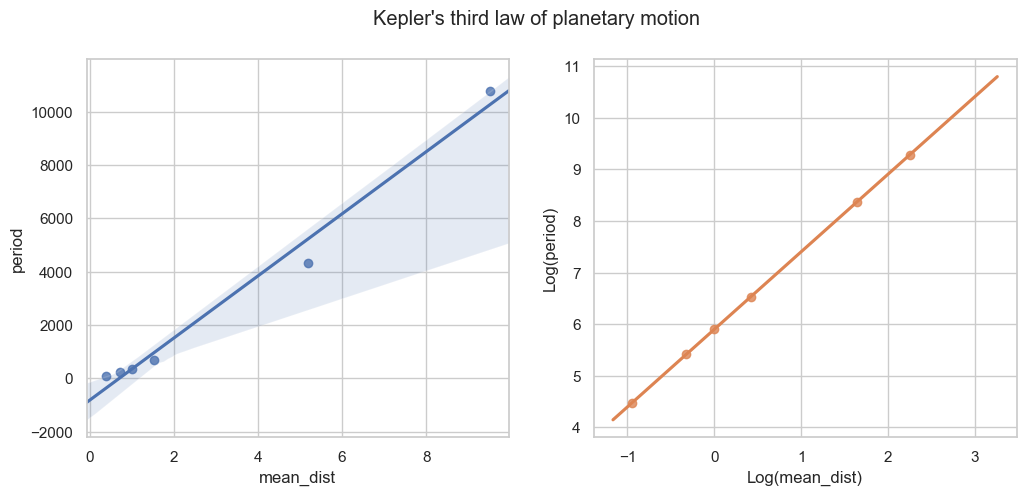

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.regplot('mean_dist', 'period', planets, ax=ax1);

sns.regplot(np.log(planets['mean_dist']), np.log(planets['period']), ax=ax2);
ax2.set_xlabel('Log(mean_dist)')
ax2.set_ylabel('Log(period)')
ax2.relim()
ax2.autoscale_view()
fig.suptitle("Kepler's third law of planetary motion");

## Functional relations

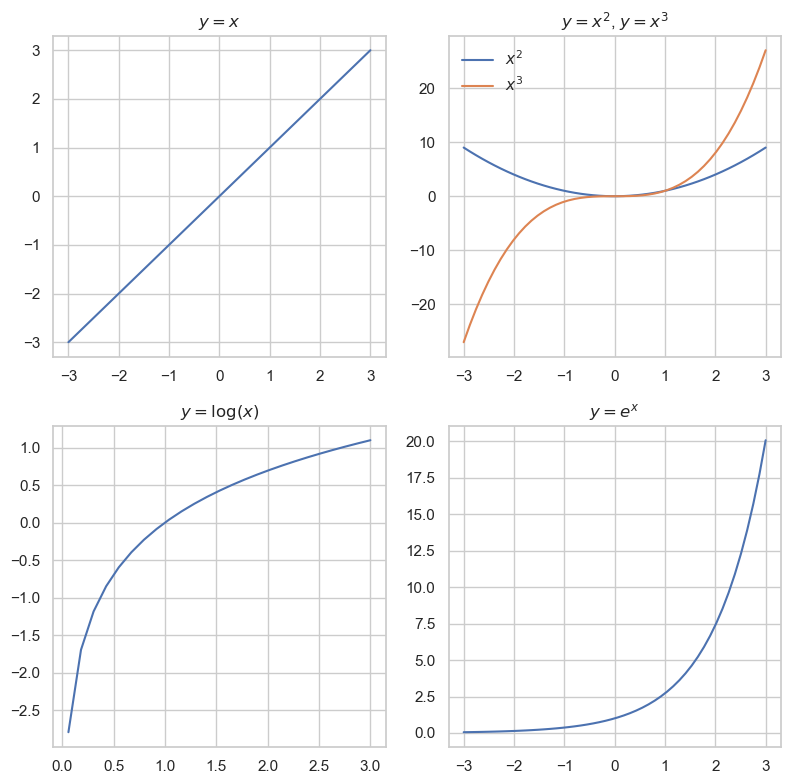

In [42]:
x = np.linspace(-3, 3)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))

# x
ax1.plot(x, x)
ax1.set_title('$y=x$')

# powers
ax2.plot(x, x**2, label='$x^2$')
ax2.plot(x, x**3, label='$x^3$')
ax2.legend()
ax2.set_title('$y=x^2$, $y=x^3$')

# log
xpos = x[x>0]  # Log is only defined for positive x
ax3.plot(xpos, np.log(xpos))
ax3.set_title(r'$y=\log(x)$')

# exp
ax4.plot(x, np.exp(x))
ax4.set_title('$y=e^x$');
plt.tight_layout();